### Assignment 6


### 1. Albedo Feedback

#### Part (a) 
##### Define a python function that implements the given albedo formula
##### Use function to calc albedo values for Temp ranges 250K to 300K
##### Plot graph of results of albedo vs global mena temp with T on x axis and albedo on y axis

In [83]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [84]:
# Intial values 

ao = 0.289 
ai = 0.7    
To = 293    
Ti = 260   

In [85]:
# Defining albedo function

def albedo_new(t):
    if t <= Ti:
        return ai
    elif Ti < t < To:
        return  ao + ( ai - ao ) * ( (t - To) **2 ) / ( (Ti-To) **2 )
    elif t >= To:
        return ao

In [86]:
# Using the function to calc albedos under Temps = 250K to 300K

temps_range = np.linspace(250, 300, 100) # -> '100' is the number of values generated between start and stop values
results = []
for t in temps_range:
    results.append(albedo_new(t))

Text(0.5, 1.0, "Albedo Values as Function of Earth's Global Mean Temperatures")

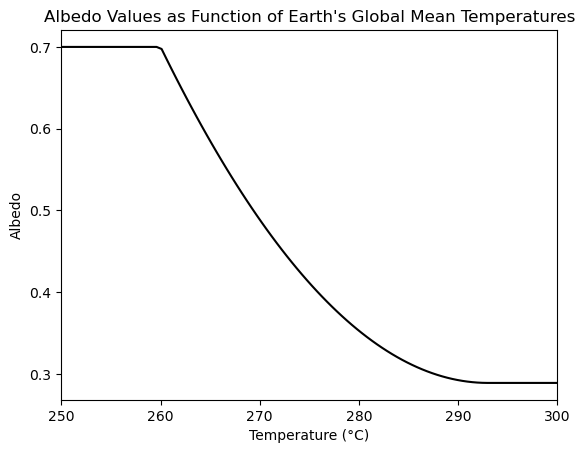

In [87]:
# Ploting graph

fig, ax = plt.subplots()
ax.margins(x=0)
ax.plot(temps_range, results, 'k-')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Albedo')
ax.set_title("Albedo Values as Function of Earth's Global Mean Temperatures")

#### Part (b)
##### Investigate climate change scenarios with new model
##### Assume emissivity changes rom 0.78 to 0.8 from additional C02
##### Albedo is not fixed and varies depending on the Part(a) formula
##### Calculate the new equilibrium surface temp. What is new total warming?
##### Use solve_ipv like in class

In [88]:
# constants

solarcon = 1366        
stefanboltzman = 5.670374419e-8 
heatcapacity = 4.0e8 
epsilon = 0.8
M = 2
albedo_old = 0.3


In [89]:
# Defining function for new surface temp balance

def new_surfbalance(t, u):
    f = np.zeros((M,))
    f[0] = (solarcon * (1 - albedo_new(u[1])) / 4 - epsilon * stefanboltzman * (u[0]**4) - (1-epsilon) * stefanboltzman * (u[1]) **4) / heatcapacity
    f[1] = (solarcon * (1 - albedo_new(u[1])) / 4 + epsilon * stefanboltzman * (u[0]**4) - stefanboltzman * (u[1]) **4) / heatcapacity
    return f

u0 = [244,288]
t0 = 0

In [90]:
# Time dependance inputs

Dt = 60*60*24*365
tmax = 100 * Dt
t = np.arange (t0, tmax, Dt)

In [91]:
# solving using solve_ivp and RK45

sol_new_temps = solve_ivp(new_surfbalance, [t0, tmax], u0, method='RK45', t_eval = t)

In [95]:
T_new = sol_new_temps.y[1,-1]
T_old = 288.27338
T_celcius = T_new - 273.15
T_diff = T_new - T_old

print("The temperature difference is %0.4f K with an original temperature of %0.4f K and a final temperature of %0.4f degrees, or %0.4f °C." % (T_diff, T_old, T_new, T_celcius))

The temperature difference is 2.3046 K with an original temperature of 288.2734 K and a final temperature of 290.5780 degrees, or 17.4280 °C.


Text(0, 0.5, 'Temperature (K)')

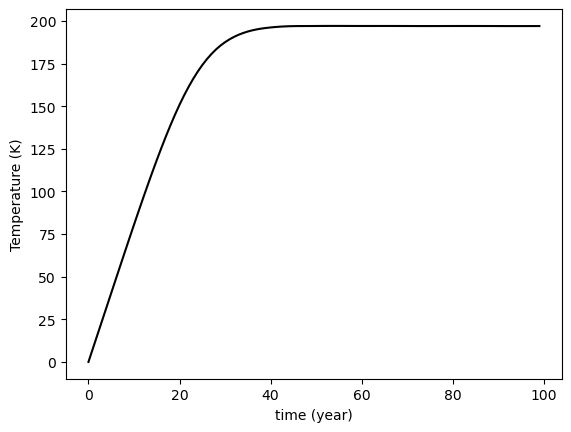

In [93]:
fig = plt.figure()
plt.plot(sol.t/(60*60*365*24),sol.y[0],'k-')
plt.xlabel('time (year)')
plt.ylabel('Temperature (K)')